# ATELIER 2 : Feature Engineering

# **Komi David ABOTSITSE**


# Introduction au Feature Engineering
Le **feature engineering** est un processus essentiel dans la préparation des données pour le machine learning. Il consiste à transformer, sélectionner, et créer de nouvelles caractéristiques à partir des données brutes afin d'améliorer la performance des modèles.

In [55]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #pour effectuer la normalisations min-max,
from sklearn.preprocessing import StandardScaler #pour effectuer la normalisations Z-score,

# Exemple de données
data = pd.DataFrame({
    'Age': [22, 45, 28, 35, 50],
    'Salaire': [30000, 60000, 35000, 50000, 70000]
})

# Normalisation par la méthode min-max
scaler = MinMaxScaler() # Initialiser le scaler min-max
data_scaled = scaler.fit_transform(data[['Salaire']]) # Appliquer la normalisation min-max sur les salaires
data['Salaire_Normalisé'] = data_scaled # Ajouter les salaires normalisés au DataFrame


# Normalisation par la méthode du Z-score (centré réduire):
scaler = StandardScaler() # Initialiser le scaler Z-score
data_standardized = scaler.fit_transform(data[['Salaire']]) # Appliquer la normalisation Z-score sur les salaires
data['Salaire_Standardisé'] = data_standardized  # Ajouter les salaires standardisés au DataFrame

data


,Age,Salaire,Salaire_Normalisé,Salaire_Standardisé
0,22,30000,0.000,-1.269491
1,45,60000,0.750,0.734968
2,28,35000,0.125,-0.935414
3,35,50000,0.500,0.066815
4,50,70000,1.000,1.403122


In [56]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # Pour encoder les variables catégorielles

# Exemple de données catégorielles
data_cat = pd.DataFrame({
    'Sexe': ['Homme', 'Femme', 'Homme', 'Femme', 'Homme']
})

encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False permet de retourner un tableau dense
encoded_data = encoder.fit_transform(data_cat[['Sexe']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.categories_[0])  # Crée un DataFrame avec les colonnes encodées
data_cat = data_cat.join(encoded_df)  # Joint les nouvelles colonnes encodées au DataFrame original

label_encoder = LabelEncoder()
data_cat['Sexe_Label'] = label_encoder.fit_transform(data_cat['Sexe'])

data_cat


,Sexe,Femme,Homme,Sexe_Label
0,Homme,0.0,1.0,1
1,Femme,1.0,0.0,0
2,Homme,0.0,1.0,1
3,Femme,1.0,0.0,0
4,Homme,0.0,1.0,1


Imputation par la moyenne

In [57]:
# Création d'un DataFrame contenant des valeurs manquantes (None)
data_missing = pd.DataFrame({
    'Age': [22, None, 28, None, 50],
    'Salaire': [30000, 60000, None, 50000, 70000]
})

# Remplacement des valeurs manquantes dans la colonne 'Age' par la moyenne des valeurs existantes
data_missing['Age'] = data_missing['Age'].fillna(data_missing['Age'].mean())
data_missing['Salaire'] = data_missing['Salaire'].fillna(data_missing['Salaire'].mean())

data_missing


,Age,Salaire
0,22.000000,30000.0
1,33.333333,60000.0
2,28.000000,52500.0
3,33.333333,50000.0
4,50.000000,70000.0


In [58]:
data['Salaire_Par_An'] = data['Salaire'] / 12 # Convertit le salaire mensuel en salaire annuel en divisant par 12
data['Age_Années_Restantes'] = 65 - data['Age'] # Calcule le nombre d'années restantes avant l'âge de la retraite (65 ans)

data


,Age,Salaire,Salaire_Normalisé,Salaire_Standardisé,Salaire_Par_An,Age_Années_Restantes
0,22,30000,0.000,-1.269491,2500.000000,43
1,45,60000,0.750,0.734968,5000.000000,20
2,28,35000,0.125,-0.935414,2916.666667,37
3,35,50000,0.500,0.066815,4166.666667,30
4,50,70000,1.000,1.403122,5833.333333,15


In [81]:
from sklearn.feature_selection import SelectKBest, f_classif  # Pour sélectionner les meilleures caractéristiques

# Exemple de données
X = pd.DataFrame({
    'Age': [22, 45, 28, 35, 50],
    'Salaire': [30000, 60000, 35000, 50000, 70000],
    'Experience': [1, 15, 5, 10, 20]
})

# Définition de la variable cible (classification binaire : 0 ou 1)
y = [0, 1, 0, 1, 1]

# Sélection des 2 meilleures caractéristiques selon le test ANOVA (f_classif)
selector = SelectKBest(f_classif, k=2) # k=2 signifie qu'on garde les 2 meilleures caractéristiques

# Ajustement du sélecteur sur les données et transformation du jeu de données
X_new = selector.fit_transform(X, y)

# Identification des caractéristiques sélectionnées
selected_features = X.columns[selector.get_support()]

selected_features


Index(['Age', 'Salaire'], dtype='object')

    Age  Salaire  Experience  Nb_Enfants     Score
0    58    55222          33           1  9.491457
1    48    97373          39           2  8.866804
2    34    99575          18           1  2.608936
3    27    83335           1           1  0.153045
4    40    30965          11           1  9.334363
..  ...      ...         ...         ...       ...
95   28    54754           3           3  2.332281
96   27    31411          24           0  5.813054
97   31    22911          32           4  8.631385
98   53    87270          22           1  8.803600
99   52    28680          23           1  2.366852

[100 rows x 5 columns]


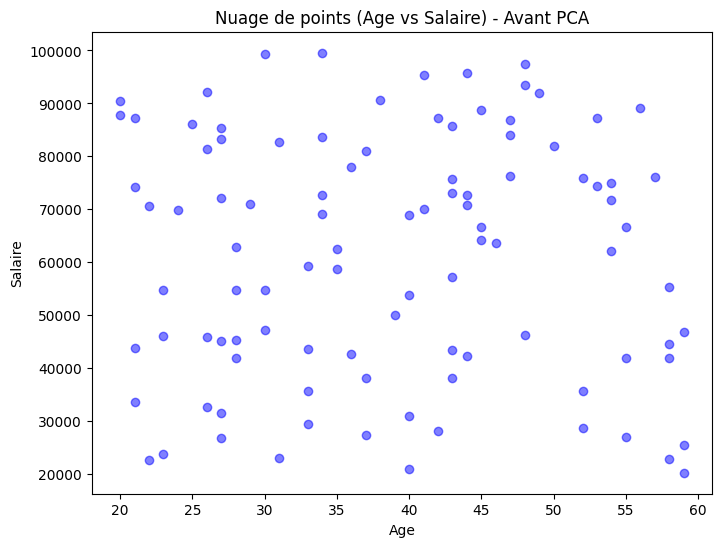

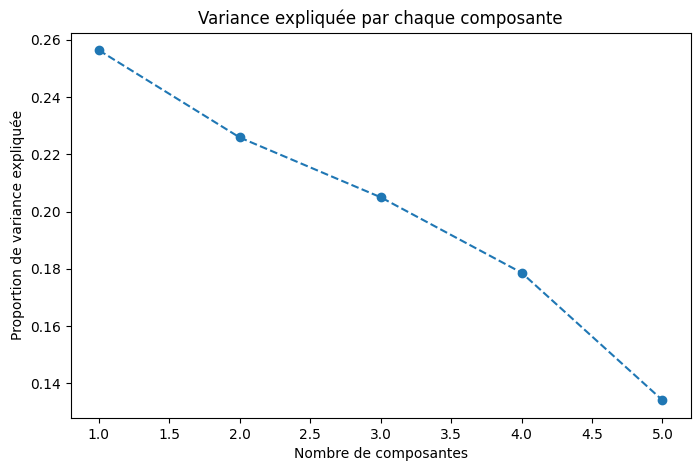

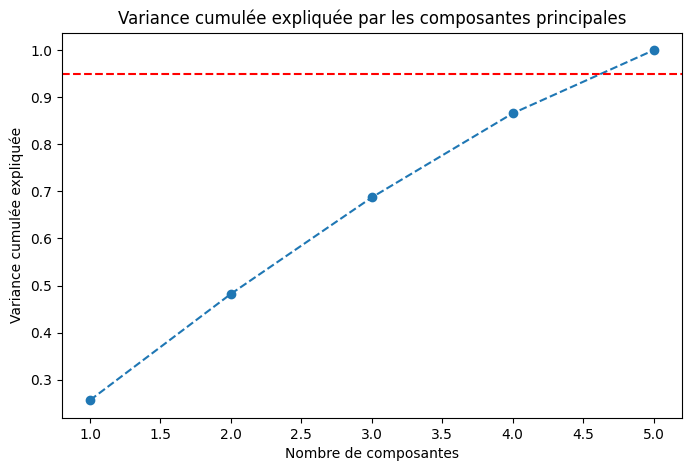

Nombre optimal de composantes pour expliquer 95% de la variance : 4


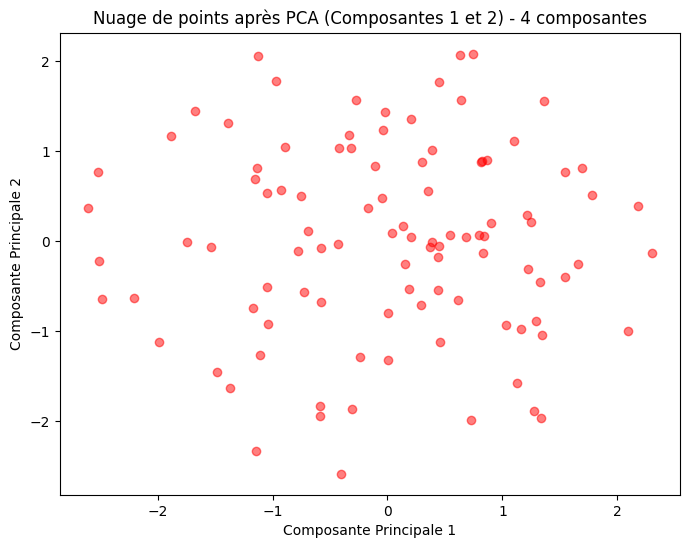

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Fixer le seed pour la reproducibilité
np.random.seed(42)

# Jeu de données fictif avec 5 variables et 100 observations
data_pca = pd.DataFrame({
    'Age': np.random.randint(20, 60, size=100),
    'Salaire': np.random.randint(20000, 100000, size=100),
    'Experience': np.random.randint(1, 40, size=100),
    'Nb_Enfants': np.random.randint(0, 5, size=100),
    'Score': np.random.uniform(0, 10, size=100)
})

# Affichage des premières lignes du DataFrame
print(data_pca)
plt.figure(figsize=(8, 6))
plt.scatter(data_pca['Age'], data_pca['Salaire'], color='b', alpha=0.5)
plt.title('Nuage de points (Age vs Salaire) - Avant PCA')
plt.xlabel('Age')
plt.ylabel('Salaire')
plt.show()

# Standardiser les données (très important pour PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)


# Application de PCA sans réduction pour analyser la variance expliquée
pca = PCA()
pca.fit(data_scaled) # Ajustement du modèle PCA sur les données standardisées

# Extraction des variances expliquées par chaque composante
explained_variance = pca.explained_variance_ratio_

# Graphique de la variance expliquée par chaque composante
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Variance expliquée par chaque composante')
plt.xlabel('Nombre de composantes')
plt.ylabel('Proportion de variance expliquée')
plt.show()

# Calcul et affichage de la variance cumulée
cumulative_variance = explained_variance.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Variance cumulée expliquée par les composantes principales')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée expliquée')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

#  Détermination du nombre optimal de composantes pour 95% de variance expliquée
n_components = (cumulative_variance <= 0.95).sum()
print(f"Nombre optimal de composantes pour expliquer 95% de la variance : {n_components}")


# Application finale de PCA avec le nombre optimal de composantes
pca = PCA(n_components=n_components)
data_pca_reduced = pca.fit_transform(data_scaled) # Transformation des données

# Visualisation des données après réduction de dimension (premières 2 composantes principales)
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_reduced[:, 0], data_pca_reduced[:, 1], color='r', alpha=0.5)
plt.title(f'Nuage de points après PCA (Composantes 1 et 2) - {n_components} composantes')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()


**Tâche à réaliser : Sélection et Extraction des Caractéristiques**

**Contexte :** Dans cette tâche, vous utiliserez un jeu de données appelé data_genes.csv (disponible sur moodle), qui contient plusieurs variables. L'objectif de cette activité est d'appliquer des méthodes de sélection de caractéristiques et d'extraction de caractéristiques via l'Analyse en Composantes Principales (ACP).

Avant de commencer les étapes suivantes, vous devrez charger le jeu de données en utilisant la commande suivante:

pd.read_csv('/chemin_vers_votre_fichier/data_genes.csv')

où 'chemin_vers_votre_fichier' est le chemin vers votre fichier csv et "pd" est l'alias que vous avez attribué à la bibliothèque pandas.

1. Sélection des Caractéristiques :
Commencez par appliquer la sélection des caractéristiques afin de retenir uniquement les variables les plus pertinentes pour la modélisation. Vous pouvez utiliser des méthodes de sélection telles que :

Sélection univariée avec des tests statistiques comme SelectKBest et f_classif.
Sélection basée sur les modèles en utilisant des méthodes comme l'élimination récursive des caractéristiques (RFE) ou la sélection basée sur les arbres.
Objectif : Sélectionner les caractéristiques les plus significatives qui ont un impact important sur la variable cible. Testez différentes méthodes et comparez les résultats obtenus.

2. Extraction des Caractéristiques avec ACP :
Une fois les caractéristiques sélectionnées, vous devrez appliquer l'Analyse en Composantes Principales (PCA) sur les données restantes pour réduire la dimensionnalité tout en préservant un maximum de variance.

Instructions :

Appliquez PCA sur les données sélectionnées.
Déterminez le nombre optimal de composantes à conserver en utilisant la méthode des coudes.
Projetez les données dans l'espace réduit et visualisez les résultats.
Critères de réussite :

Vous avez sélectionné un sous-ensemble des caractéristiques les plus significatives.
Vous avez réduit la dimensionnalité des données avec PCA et expliqué au moins 95% de la variance.
Vous avez visualisé la variance expliquée par chaque composante ainsi que la projection des données dans l'espace réduit.
Remarque : N'oubliez pas de normaliser les données avant d'appliquer PCA, car cette méthode est sensible à l'échelle des variables.

## <div class="alert alert-block alert-info">Vous devez retourner ce notebook avec les commentaires sur l'ensemble du code y compris la partie faite durant la séance de l'atelier !</div>


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Chargement des données**

In [62]:
genes = pd.read_csv('data_genes 2.csv')
genes.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [63]:
genes.tail()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000
800,sample_800,0.0,2.325242,3.805932,6.530246,9.560367,0.0,7.957027,0.000000,0.0,...,6.403075,8.594354,10.243079,9.139459,10.102934,11.641081,10.607358,9.844794,4.550716,0.000000


**Détails sur notre jeu de données:**


In [64]:
genes.columns

Index(['Unnamed: 0', 'gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4',
       'gene_5', 'gene_6', 'gene_7', 'gene_8',
       ...
       'gene_20521', 'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525',
       'gene_20526', 'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530'],
      dtype='object', length=20532)

In [65]:
genes.shape

(801, 20532)

In [66]:
genes.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


**Vérification pour voir s'il y a valeurs manquantes par variables**



In [67]:
genes.isnull().sum()

,0
Unnamed: 0,0
gene_0,0
gene_1,0
gene_2,0
gene_3,0
...,...
gene_20526,0
gene_20527,0
gene_20528,0
gene_20529,0


In [68]:
len(genes)

801

# Creation du target (y) avec 801 lignes pour respecter le nombre de lignes de notre jeu de données

## Importance du target dans le TP :

Ces variables fictifs seront utiles pour certaines méthodes de sélections de caractéristiques

In [69]:
np.random.seed(42)

# Nombre d'observations
num_samples = len(genes)

# Générer une variable cible (target) avec 5 classes representés (0 à 4)
y = pd.DataFrame({'target': np.random.randint(0, 5, size=num_samples)})

print(y)

     target
0         3
1         4
2         2
3         4
4         4
..      ...
796       4
797       1
798       2
799       2
800       2

[801 rows x 1 columns]


In [70]:
genes_target = genes.join(y) #Concaténation des deux dataframe (genes : features et y : target)
genes_target.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,target
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,3
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,4
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,2
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,4
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,4


In [71]:
genes_target.tail()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,target
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,4
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,1
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,2
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,2
800,sample_800,0.0,2.325242,3.805932,6.530246,9.560367,0.0,7.957027,0.000000,0.0,...,8.594354,10.243079,9.139459,10.102934,11.641081,10.607358,9.844794,4.550716,0.000000,2


# Imputation des valeurs manquantes par la moyenne au cas ou il y aurait des valeurs manquantes dans notre jeu de données

L’imputation des valeurs manquantes par la moyenne consiste à remplacer les valeurs absentes dans un jeu de données par la moyenne de la colonne correspondante.

In [72]:
genes_target = genes_target.apply(lambda x: x.fillna(x.mean()) if x.dtype != 'object' else x)
print(genes_target.isnull().sum())

Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
target        0
Length: 20533, dtype: int64


In [73]:
genes_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20533 entries, Unnamed: 0 to target
dtypes: float64(20531), int64(1), object(1)
memory usage: 125.5+ MB


# Quelques statistiques interessantes sur nos variables

In [74]:
genes_target.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,target
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411,2.000000
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529,1.438749
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000,1.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000,2.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000,3.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133,4.000000


In [75]:
import warnings
warnings.filterwarnings("ignore")

# Feature selection :


## 1. Sélection univariée avec des tests statistiques comme **SelectKBest** et **f_classif**

**SelectKBest** sélectionne les **K variables X** dont le **score** du test de dépendance avec y est le plus élevé

Dans notre cas **le test de dépendance** utilisé est **ANOVA**

### Sélection des 2 meilleures caractéristiques (k=2)


In [76]:
from sklearn.feature_selection import SelectKBest, f_classif

X = genes_target.iloc[:, 1:-1]
y = genes_target.iloc[:, -1]

selector = SelectKBest(f_classif, k=2)# Création du sélecteur, gardant les 2 meilleures features selon ANOVA
X_new = selector.fit_transform(X, y)# Sélection et transformation des données

selected_features_KBest = X.columns[selector.get_support()]# Extraction des noms des features sélectionnées
print(selected_features_KBest)

Index(['gene_511', 'gene_12938'], dtype='object')


## 2. Sélection de caractéristique avec SelectFromModel et un modele **SGDClassifier**

**SelectFromModel** est une méthode de sélection de caractéristiques qui utilise un modèle prédictif pour attribuer des poids à chaque caractéristique, puis élimine celles dont l'importance est inférieure à un certain seuil.

Dans ce cas, le modèle utilisé est **SGDClassifier**, qui est une variante de Régression Logistique ou SVM linéaire, entraîné avec une descente de gradient stochastique.

### Étapes du processus :

*   Le modèle **(SGDClassifier)** est entraîné sur les données (X, y).
*   Chaque caractéristique reçoit un coefficient **(poids absolu des coefficients du modèle)**.
*   Un seuil de sélection est appliqué (threshold='mean' dans ce cas), qui garde uniquement les **caractéristiques ayant un coefficient supérieur à la moyenne des valeurs absolues des coefficients**.
*  Les caractéristiques retenues sont renvoyées sous forme d'un sous-ensemble de X.


In [77]:
from sklearn.linear_model import SGDClassifier  # classificateur linéaire basé sur la descente de gradient stochastique
from sklearn.feature_selection import SelectFromModel #Permet de sélectionner les caractéristiques les plus importantes en fonction d'un modèle.


# Séparation des caractéristiques et de la cible
X = genes_target.iloc[:, 1:-1]
y = genes_target.iloc[:, -1]

selector = SelectFromModel(SGDClassifier(random_state=42),threshold='mean') # Classificateur linéaire qui attribuera des poids aux caractéristiques. Seules les caractéristiques ayant un poids supérieur à la moyenne des poids absolus seront retenues.
selector.fit_transform(X, y)

selected_features_FromModel = X.columns[selector.get_support()]
print(selected_features_FromModel)

Index(['gene_1', 'gene_2', 'gene_6', 'gene_10', 'gene_11', 'gene_13',
       'gene_18', 'gene_21', 'gene_26', 'gene_27',
       ...
       'gene_20496', 'gene_20499', 'gene_20500', 'gene_20504', 'gene_20509',
       'gene_20514', 'gene_20515', 'gene_20521', 'gene_20524', 'gene_20529'],
      dtype='object', length=7657)


## 3.  Variance threshold

**Variance Threshold** est une méthode de sélection de variables qui élimine toutes les caractéristiques ayant une faible variance. Cet algorithme de sélection ne p**rend en compte que les variables explicatives (X)** et **ignore la variable cible (y)** ou target, ce qui le rend adapté à l'apprentissage non supervisé. **Les variables** dont la **variance** dans l'**ensemble d'entraînement** est **inférieure** à ce **seuil** seront **supprimées**.
Elle élimine les variables dont la variance est inférieur à un seuil donné

In [78]:
from sklearn.feature_selection import VarianceThreshold

# Séparation des caractéristiques et de la cible
X = genes_target.iloc[:, 1:-1]

#Calcul de la Variance de chacune des variable feature
X.var(axis=0)

selector = VarianceThreshold(threshold=0.5) #Transformer dans lequel un seuil(0.5) est defini
X_new = selector.fit_transform(X)

selected_features_variance = X.columns[selector.get_support()]
print(selected_features_variance)

Index(['gene_1', 'gene_2', 'gene_6', 'gene_10', 'gene_11', 'gene_18',
       'gene_19', 'gene_20', 'gene_21', 'gene_22',
       ...
       'gene_20501', 'gene_20504', 'gene_20507', 'gene_20513', 'gene_20514',
       'gene_20519', 'gene_20520', 'gene_20521', 'gene_20524', 'gene_20529'],
      dtype='object', length=12916)


#4. ExtraTreesClassifier et SelectFromModel

* C'est un ensemble d'arbres de décision basé sur la méthode des arbres extrêmement aléatoires (Extra-Trees).
Contrairement aux Random Forests, il choisit aléatoirement les seuils des divisions au lieu d’optimiser le critère de séparation.
Il permet d'estimer l'importance des caractéristiques en regardant la réduction d'impureté qu'elles apportent.

* Sélection des caractéristiques : SelectFromModel
Cette méthode sélectionne les caractéristiques les plus importantes en fonction d'un modèle donné.
Ici, on utilise ExtraTreesClassifier pour attribuer un score d'importance à chaque caractéristique.
Seules celles dont l’importance est supérieure à la moyenne (threshold='mean') sont conservées.

In [79]:

from sklearn.ensemble import ExtraTreesClassifier  # Classificateur basé sur des arbres extra aléatoires
from sklearn.feature_selection import SelectFromModel  # Sélection des caractéristiques
import pandas as pd

# Remplacez par le chemin de votre fichier
X = genes_target.iloc[:, 1:-1]  # Sélection des caractéristiques
y = genes_target.iloc[:, -1]  # Cible

# Initialisation et entraînement du modèle
clf = ExtraTreesClassifier(n_estimators=50, random_state=42)
clf.fit(X, y)

# Sélection des caractéristiques basées sur l'importance des features
selector = SelectFromModel(clf, threshold='mean', prefit=True)
X_new = selector.transform(X)
selected_features_FromModel = X.columns[selector.get_support()]

print(selected_features_FromModel)

Index(['gene_0', 'gene_2', 'gene_8', 'gene_10', 'gene_11', 'gene_13',
       'gene_14', 'gene_20', 'gene_21', 'gene_22',
       ...
       'gene_20500', 'gene_20501', 'gene_20502', 'gene_20503', 'gene_20508',
       'gene_20516', 'gene_20521', 'gene_20522', 'gene_20523', 'gene_20527'],
      dtype='object', length=8833)


## Comparaison des méthodes utilisées et des résultats

### Sélection univariée avec des tests statistiques comme **SelectKBest** et **f_classif**

*   Pour la sélection univariée avec des tests statistiques
comme **SelectKBest** et **f_classif**.Il faut choisir à l'avance combien de variables garder (k), ce qui fait qu'on a une flexibilité sur les variables à garder


*   Pour utiliser cette méthode on aura besoin d'une variable target (y), donc elle ne peut pas être utilisée pour la réduction de dimension en clustering, par exemple


### Sélection de caractéristique avec SelectFromModel

*   Mention d'un seuil arbitraire : Le seuil 'mean' ou n'importe quel valeur pris comme seuil sélectionne les caractéristiques ayant un poids supérieur à la valeur absolue de ce seuil, mais ce choix n'est pas forcément optimal.

*   On a une dépendance par rapport au modèle choisi : La sélection des caractéristiques dépend entièrement du SGDClassifier, ce qui signifie que d'autres modèles pourraient sélectionner des variables différentes.

### Variance threshold

* Dépend du seuil choisi : Fixer un seuil arbitraire (ex. 0.5 dans notre cas ) ce qui peut entraîner la suppression de variables importantes ou, au contraire, la conservation de variables peu utiles.
* Ignorance de la relation avec la cible (y) : Contrairement à des méthodes comme SelectKBest ou SelectFromModel, cette méthode ne prend pas en compte la pertinence d’une caractéristique pour la prédiction.

* Peu efficace si les données sont déjà standardisées : Après une normalisation (ex. StandardScaler), la variance de toutes les caractéristiques est souvent proche de 1, ce qui peut rendre VarianceThreshold inutile.

* Nécessite une bonne compréhension des données : Avant d’appliquer un seuil, il faut analyser les distributions des variables pour éviter de supprimer celles qui ont une faible variance mais sont néanmoins informatives.


### Extraclassifier et SelectfromModel

* Le seuil (threshold) doit être bien réglé ⚠️
Par défaut, threshold='mean', mais parfois il faut ajuster manuellement (median, 0.01, etc.).

# ACP

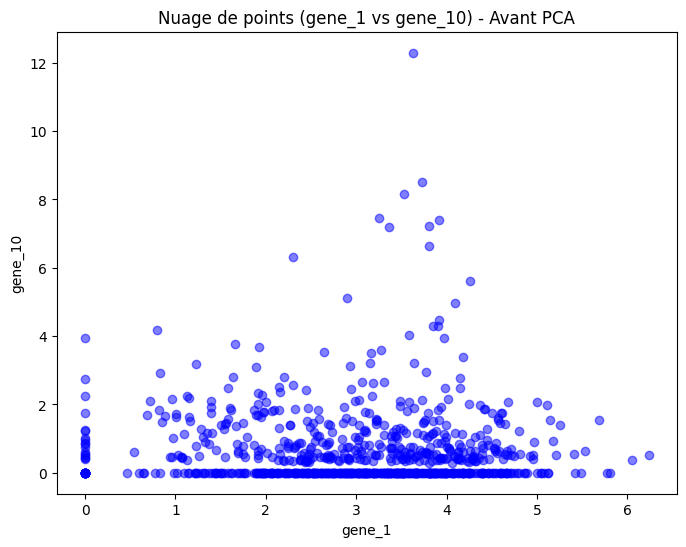

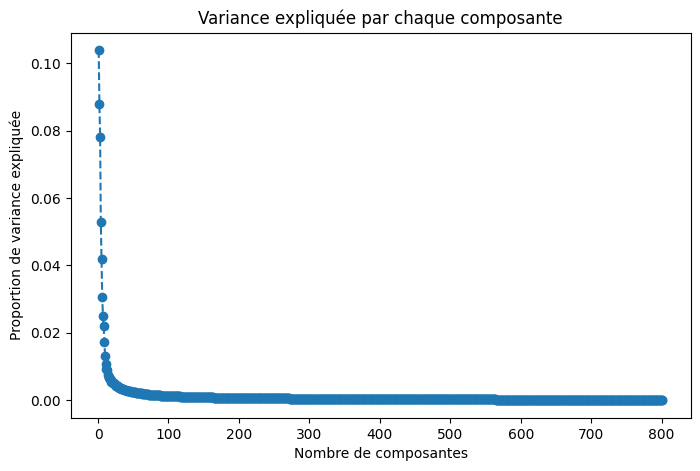

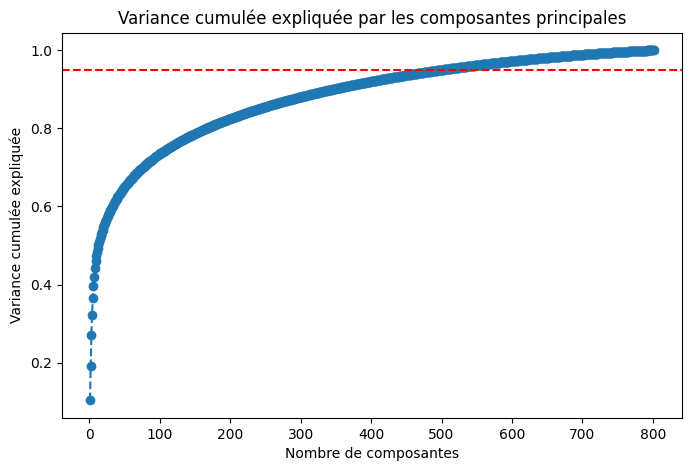

Nombre optimal de composantes pour expliquer 95% de la variance : 501


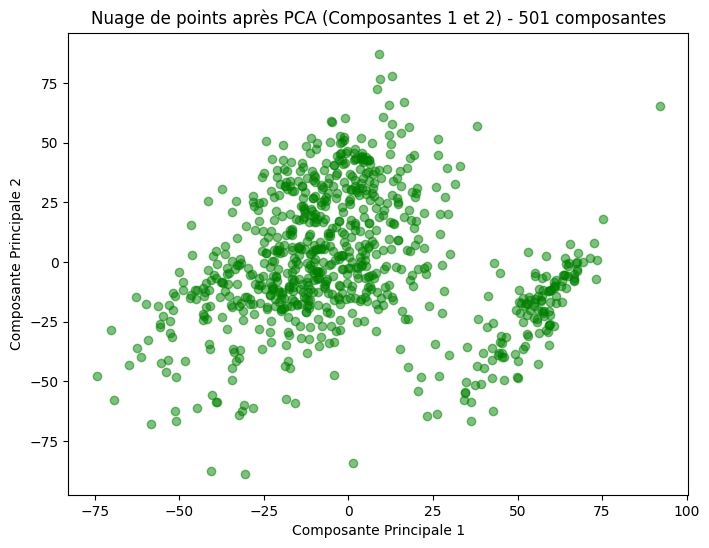

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Sélection de deux features au hasard suivi d'un scatter plot

plt.figure(figsize=(8, 6))
plt.scatter(genes_target['gene_1'], genes_target['gene_10'], color='b', alpha=0.5)
plt.title('Nuage de points (gene_1 vs gene_10) - Avant PCA')
plt.xlabel('gene_1')
plt.ylabel('gene_10')
plt.show()

# Standardiser les données (très important pour PCA)
scaler = StandardScaler()
genes_target_scaled = scaler.fit_transform(genes_target[selected_features_FromModel]) #Standardisation des features après une première selection de caractéristiques(selectFromModel et Extraclassifier)


# Appliquer PCA
pca = PCA() # Initialisation de PCA (sans préciser le nombre de composantes)
pca.fit(genes_target_scaled)


# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_ # Récupération de la variance expliquée par chaque composante



plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Variance expliquée par chaque composante')
plt.xlabel('Nombre de composantes')
plt.ylabel('Proportion de variance expliquée')
plt.show()


cumulative_variance = explained_variance.cumsum()# Calcul de la variance expliquée cumulée
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Variance cumulée expliquée par les composantes principales')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée expliquée')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

n_components = (cumulative_variance <= 0.95).sum() # Trouver le plus petit nombre de composantes expliquant au moins 95% de la variance
print(f"Nombre optimal de composantes pour expliquer 95% de la variance : {n_components}")



pca = PCA(n_components=n_components) # Recalcul de PCA avec le nombre optimal de composantes
gene_target_reduced = pca.fit_transform(genes_target_scaled)


#Visualisation des données après PCA
plt.figure(figsize=(8, 6))
plt.scatter(gene_target_reduced[:, 0], gene_target_reduced[:, 1], color='g', alpha=0.5)
plt.title(f'Nuage de points après PCA (Composantes 1 et 2) - {n_components} composantes')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()

# Références


https://medium.com/@nmscott14/3-feature-selection-methods-e7ccd6dbf316

https://scikit-learn.org/stable/modules/feature_selection.html

https://spotintelligence.com/2024/11/18/recursive-feature-elimination-rfe/

https://machinelearningmastery.com/feature-selection-machine-learning-python/

https://medium.com/analytics-vidhya/feature-selection-embedded-methods-a7940036973f
